# Zomato Data Analysis
    - What type of resturents do the majority of customers order from?
    - How many votes has each type of resturents recieved from customers?
    - What arethe ratings that the majority of resturents has recieved?
    - Zomato gas observed that most couples order the most of theirfood online. What is their average spending on each other?
    - Which mode (online or offline) has recieved the maximum rating?
    - Which type of resturents recieved more offline orders, so that Zomato can provide customers with some good offers?

Step 1: Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Upload the dataset

In [2]:
df = pd.read_csv("Zomato-data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


Convert the data type of column - rate

In [5]:
def get_rate(rating):
    rating = str(rating).split("/")
    rating = rating[0]
    return float(rating)

df['rate'] = df['rate'].apply(get_rate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Type of resturant

C:\Users\monty\AppData\Local\Temp\ipykernel_12204\4037239923.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette='husl')


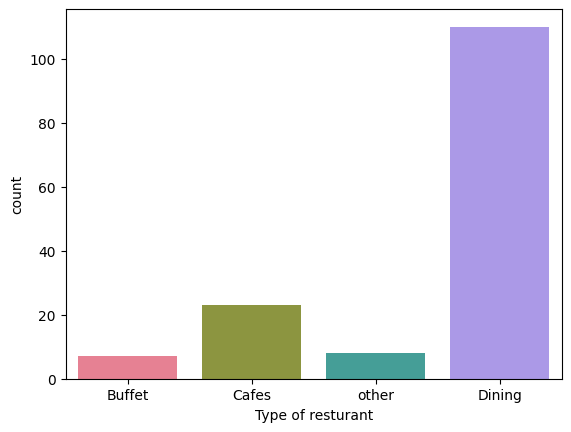

In [6]:
sns.countplot(x=df['listed_in(type)'], palette='husl')
plt.xlabel("Type of resturant")
plt.show()

Conclusion - Majority of the resturant falls in dinning category 

In [7]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'Votes')

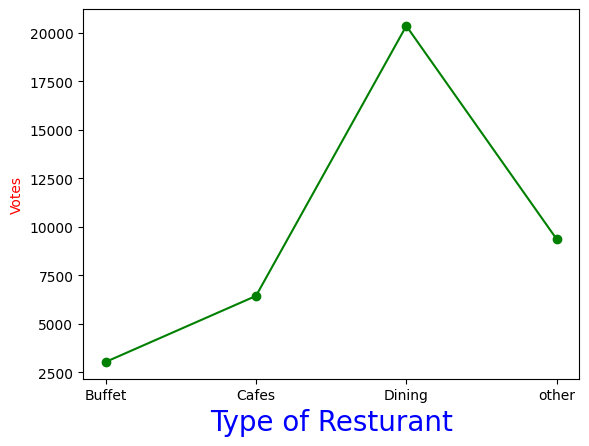

In [8]:
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker="o")
plt.xlabel("Type of Resturant", c='blue',size=20)
plt.ylabel('Votes',c='red',size=10)

Conclusion: Dinning resturents has recieved maximum votes

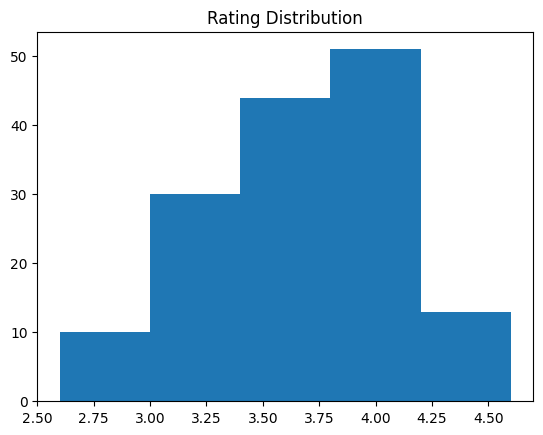

In [9]:
plt.hist(df['rate'], bins=5)
plt.title("Rating Distribution")
plt.show()

Conclusion: The majority resturents recieved in between 3.5 to 4

# Average order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

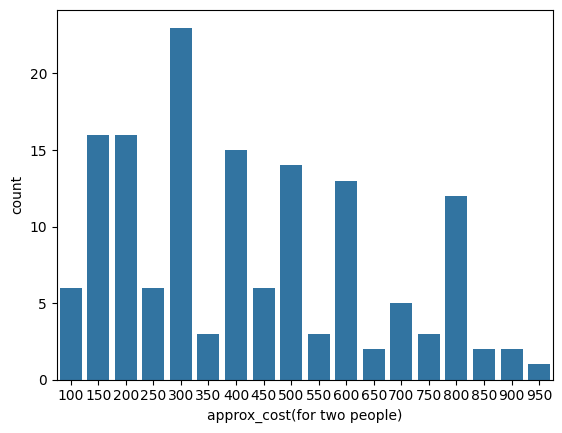

In [10]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Conclusion: Majority of couples prefer resturents with an approximate with an cost of 300

# Which mode recieves maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

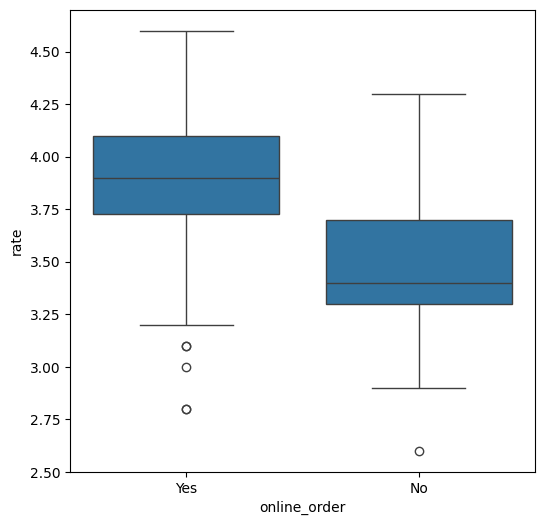

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)

Conclusion: Offline orders recieves lower ratings in comparison to online orders

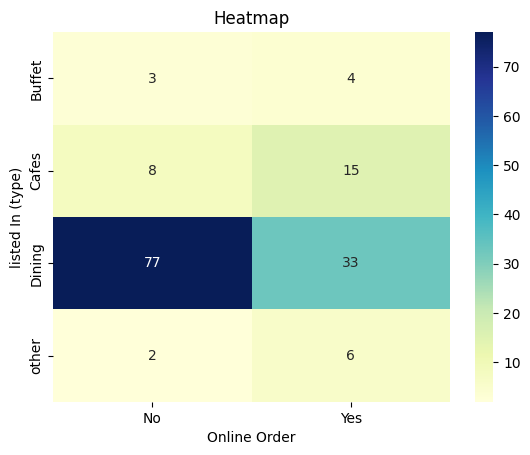

In [12]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('listed In (type)')
plt.show()

Conclusion: Dinning resturents primarily accept offline orders, whereas cafes
primarily recieve online orders. This suggests that clients prefer to place orders in person at resturents,
but prefer online ordering at cafes.